<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/ProblemSheets/ProblemSheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Sheet 1: Introduction to networks

1. Consider the below adjacency matrix of a network

  $$A = \begin{bmatrix}0&0&1&1&0\\1&0&0&0&0\\0&1&0&1&0\\
  0&0&0&0&0\\1&0&1&0&0\end{bmatrix}
  $$
  
  (a) Is the network directed or undirected?

  (b) List the in-degree seuqence and out-degree sequence of the network.

  (c) Determine the in-degree distribution and out-degree distribution.

  (d) Use the code box below to plot the network using the *NetworkX* Python package.

```{toggle}
**Question 1 Solution**

  (a) Directed

  (b)   
  $$
    \mathbf{
    k^\mathrm{in} = [2, 1, 2, 2, 0] \quad\text{and}\quad k^\mathrm{out} = [2, 1, 2, 0, 2]}
  $$

  (c) In-degree distribution:
  $$\mathbf{
    p_0=\frac{1}{5}, p_1 = \frac{1}{5}, p_2=\frac{3}{5} \text{ and } p_k=0, k>2}
  $$
  Out-degree distribution:
  $$\mathbf{
  p_0=\frac{1}{5}, p_1 = \frac{1}{5}, p_2=\frac{3}{5} \text{ and } p_k=0, k>2}
  $$

```

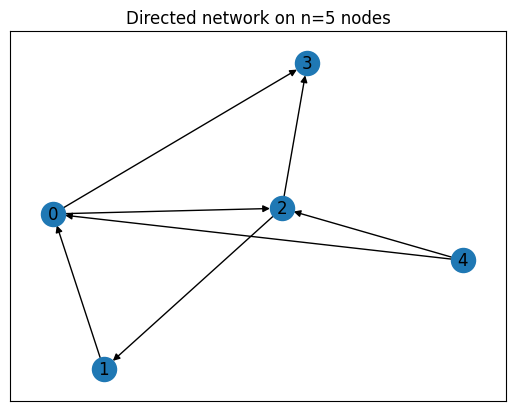

In [1]:
# Question 1(d)

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# create a network object in networkx

# adjacency matrix
A = np.array([[0, 0, 1, 1, 0],
              [1, 0, 0, 0, 0],
              [0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0],
              [1, 0, 1, 0, 0]])
G = nx.from_numpy_array(A,create_using=nx.MultiDiGraph())

# plot the network
nx.draw_networkx(G)
plt.title('Directed network on n=5 nodes');

2. Given a set of nodes $V$ such that $|V|=6$ with each node labelled from $i=1,\ldots, 6$, consider the network $N = \left( V, E\right)$ such that each link from node $j$ to node $i$ indicates that $j$ is a multiple of $i$.

  (a) Draw the network.

  (b) Write down the edge list of the network.

  (c) Write down the adjacency matrix of the network.

  (d) Are there any self-loops in the network? If so, how many?

  (e) In Python, create two instances of the above network: the first as an edge list and the second using an adjacency matrix. How many edges does the network have?

```{toggle}
**Question 2 Solution**

  (a) See part (e).
  
  (b) The edge list is
    $$
  E = \left\{(1,1), (2,1), (3,1),(4,1),(5,1),(6,1),(2,2),(4,2)\\
  (6,2),(3,3),(6,3),(4,4)(5,5),(6,6)\right\}
  $$

  (c) The adjacency matrix is given by
   $$\mathbf{
  A = \begin{pmatrix}1&0&0&0&0&0\\
  1&1&0&0&0&0\\1&0&1&0&0&0\\1&1&0&1&0&0\\
  1&0&0&0&1&0\\1&1&1&0&0&1
  \end{pmatrix}}
  $$

  (d)  Yes, 6 self-loops.
```

In [2]:

import networkx as nx
import numpy as np
import pandas as pd

# edge list representation (read in from my github page)
url = 'https://raw.githubusercontent.com/jjcrofts77/TMB-MATH34041/main/content/Data/EdgeList.csv'
df = pd.read_csv(url,header=None)
print('The edge list is given by:\n')
print(df)

# create graph object from edgelist
G = nx.Graph()
G = nx.from_pandas_edgelist(df,0,1)

# adacency matrix representation
A = np.array([[1,0,0,0,0,0],
              [1,1,0,0,0,0],
              [1,0,1,0,0,0],
              [1,1,0,1,0,0],
              [1,0,0,0,1,0],
              [1,1,1,0,0,1]])

# number of edges m
m = A.sum()
print('\n')
print('The network has m = %i edges' %m)

The edge list is given by:

    0  1
0   1  1
1   2  1
2   2  2
3   3  1
4   3  3
5   4  1
6   4  2
7   4  4
8   5  1
9   5  5
10  6  1
11  6  2
12  6  3
13  6  6


The network has m = 14 edges


3. List 5 examples of complex networks, specifying

  -  what the nodes represent;
  - what type of interactions occurs;
  - if the network is directed or undirected;
  - if the network is weighted or unweighted.

  Using the code box below, write a Python program that imports a network dataset describing a real-world biological system (see the [Data folder](https://github.com/jjcrofts77/TMB-MATH34041/tree/main/content/Data) on my Github page for some examples) and plot it. Include an informative caption and figure heading.

```{toggle}
Examples include but are not restricted to
  - *Cortical networks* which are directed with nodes denoting either neurons, cortical columns or brain regions. Connections can be physical (*i.e.* axons and white matter fibres) or virtual (functional connectivity) measuring correlations in dynamics across time.
  - *Metabolic networks* in which the nodes are metabolites (molecules that take part in reactions within the cells of an organism) and edges between molecules if they take part in the same reaction. Note that chemical reaction networks are more accuartely modelled as hypernetworks.
  - *Protein interaction networks* in which the nodes are proteins and they are connected if they physically bond. These networks are naturally modelled as undirected networks.
  - *Gene regulatory networks* which model gene expression within an organism. Nodes are a collection of regulatory elements that are connected if they are involved in governing the expression of the same set of genes.
  - A *human disease network* is a network of human diseases *i.e.* the nodes denote different diseases and two diseases (nodes) are connected if they share at least one associated gene, that is a gene that has been linked with the disease.
```

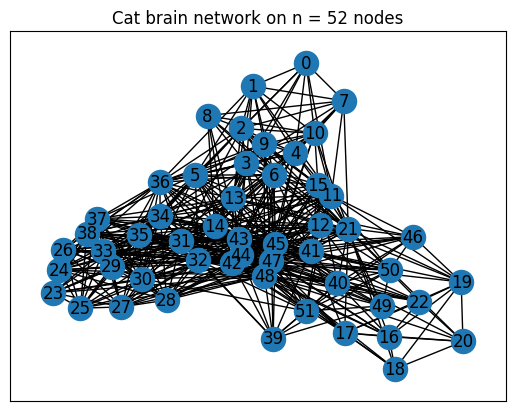

In [3]:
# Question 3

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# import data using pandas
url = 'https://raw.githubusercontent.com/jjcrofts77/TMB-MATH34041/main/content/Data/Cat.txt'
df = pd.read_csv(url,header=None)

# construct a network object in networkx
A = df.to_numpy() # create a numpy array object
G = nx.from_numpy_array(A)

# plot the network
nx.draw_networkx(G)
plt.title('Cat brain network on n = 52 nodes');

4. Read the First paper on the Additional Reading Section in NOW (Joel E. Cohen, 2004). Write down a sentence or two concerning the key messages of the paper.

----